#### Ing. Jorge Eduardo Ronsón Ruiz
#### jerondonr@unal.edu.co - 3012751445
#### Universidad Nacional de Colombia

# **<center>Red Neuronal de Regresión</center>**

# 1. Importar librerias:

In [328]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd

import sklearn as skl
from sklearn import datasets
import matplotlib.pyplot as plt

import seaborn as sb
import pathlib

# 2. Carga de datos:

In [329]:
#dataPath='/home/jorgerondon/Documentos/InteligenciaArtificial/DiplomadoIA/CuadernosJupyterJorgeE/TallerBoston/housing.csv'
#df=pd.read_csv(dataPath).copy()
#dataPath = keras.utils.get_file("nombreArchivo", "rutaArchivo")
dictBoston = datasets.load_boston()
dictBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [330]:
dictBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [331]:
print(dictBoston["data"].shape)
print(dictBoston["target"].shape)
#print(dictBoston["feature_names"])
print(dictBoston["DESCR"])
print(dictBoston["filename"])

(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    

In [332]:
df=pd.DataFrame(data=dictBoston["data"], columns=dictBoston["feature_names"])
#df[df[["CHAS"]]==1].count()

In [333]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [334]:
df["Labels"]=dictBoston["target"] #Incluyo la columna de etiquetas en el dataframe para que al 
# sacar la porción de datos de entrenamiento y test, estos mismos indices se saquen para los labels. De lo contrario
# features y labels no coincidirian.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Labels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [335]:
print(dictBoston["target"].shape)

(506,)


In [336]:
##He decidido realizar la codificación One-hot directamente en df y no posteriormente
##en x_train y x_test para ahorra trabajo
chas = df.pop("CHAS") #Elimino la columna CHAS para reemplazarla por su codificación One-Hot
df["River"] = (chas==1)*1.0
df["noRiver"] = (chas == 0)*1.0 #creo las columnas de la codificación one-hot y asigno 1 según sea el caso.
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Labels,River,noRiver
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0,1.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0,1.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0,1.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0,1.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0,1.0


# 3. Preparación de datos de entrenamiento y validación

In [337]:
df.isna().sum() #No hay datos faltantes

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Labels     0
River      0
noRiver    0
dtype: int64

In [338]:
x_train = df.sample(frac=0.8, random_state=0) #Seleccióno el 80% de los datos para entrenamiento
x_test = df.drop(x_train.index) # Selecciono el resto para test.

In [339]:
x_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Labels,River,noRiver
329,0.06724,0.0,3.24,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6,0.0,1.0
371,9.23230,0.0,18.10,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,0.0,1.0
219,0.11425,0.0,13.89,0.5500,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0,1.0,0.0
403,24.80170,0.0,18.10,0.6930,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3,0.0,1.0
78,0.05646,0.0,12.83,0.4370,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.21038,20.0,3.33,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85,35.1,0.0,1.0
227,0.41238,0.0,6.20,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6,0.0,1.0
148,2.33099,0.0,19.58,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8,0.0,1.0
143,4.09740,0.0,19.58,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6,0.0,1.0


# 4. Codificación one-hot
Decidí hacer la codificación antes de separar datos de entrenamiento y test. Este paso esta mas atras 
directamente en df.

In [29]:
#chas = x_train.pop("CHAS") #Elimino la columna CHAS para reemplazarla por su codificación One-Hot

In [30]:
#x_train["River"] = (chas==1)*1.0
#x_train["noRiver"] = (chas == 0)*1.0 #creo las columnas de la codificación one-hot y asigno 1 según sea el caso.

In [31]:
#x_train.head()

In [32]:
#chas = x_test.pop("CHAS") #Elimino la columna CHAS para reemplazarla por su codificación One-Hot
#x_test["River"] = (chas==1)*1.0
#x_test["noRiver"] = (chas == 0)*1.0 #creo las columnas de la codificación one-hot y asigno 1 según sea el caso.
#x_test.head()

# 5. Análisis grafico de mis datos de entrada.

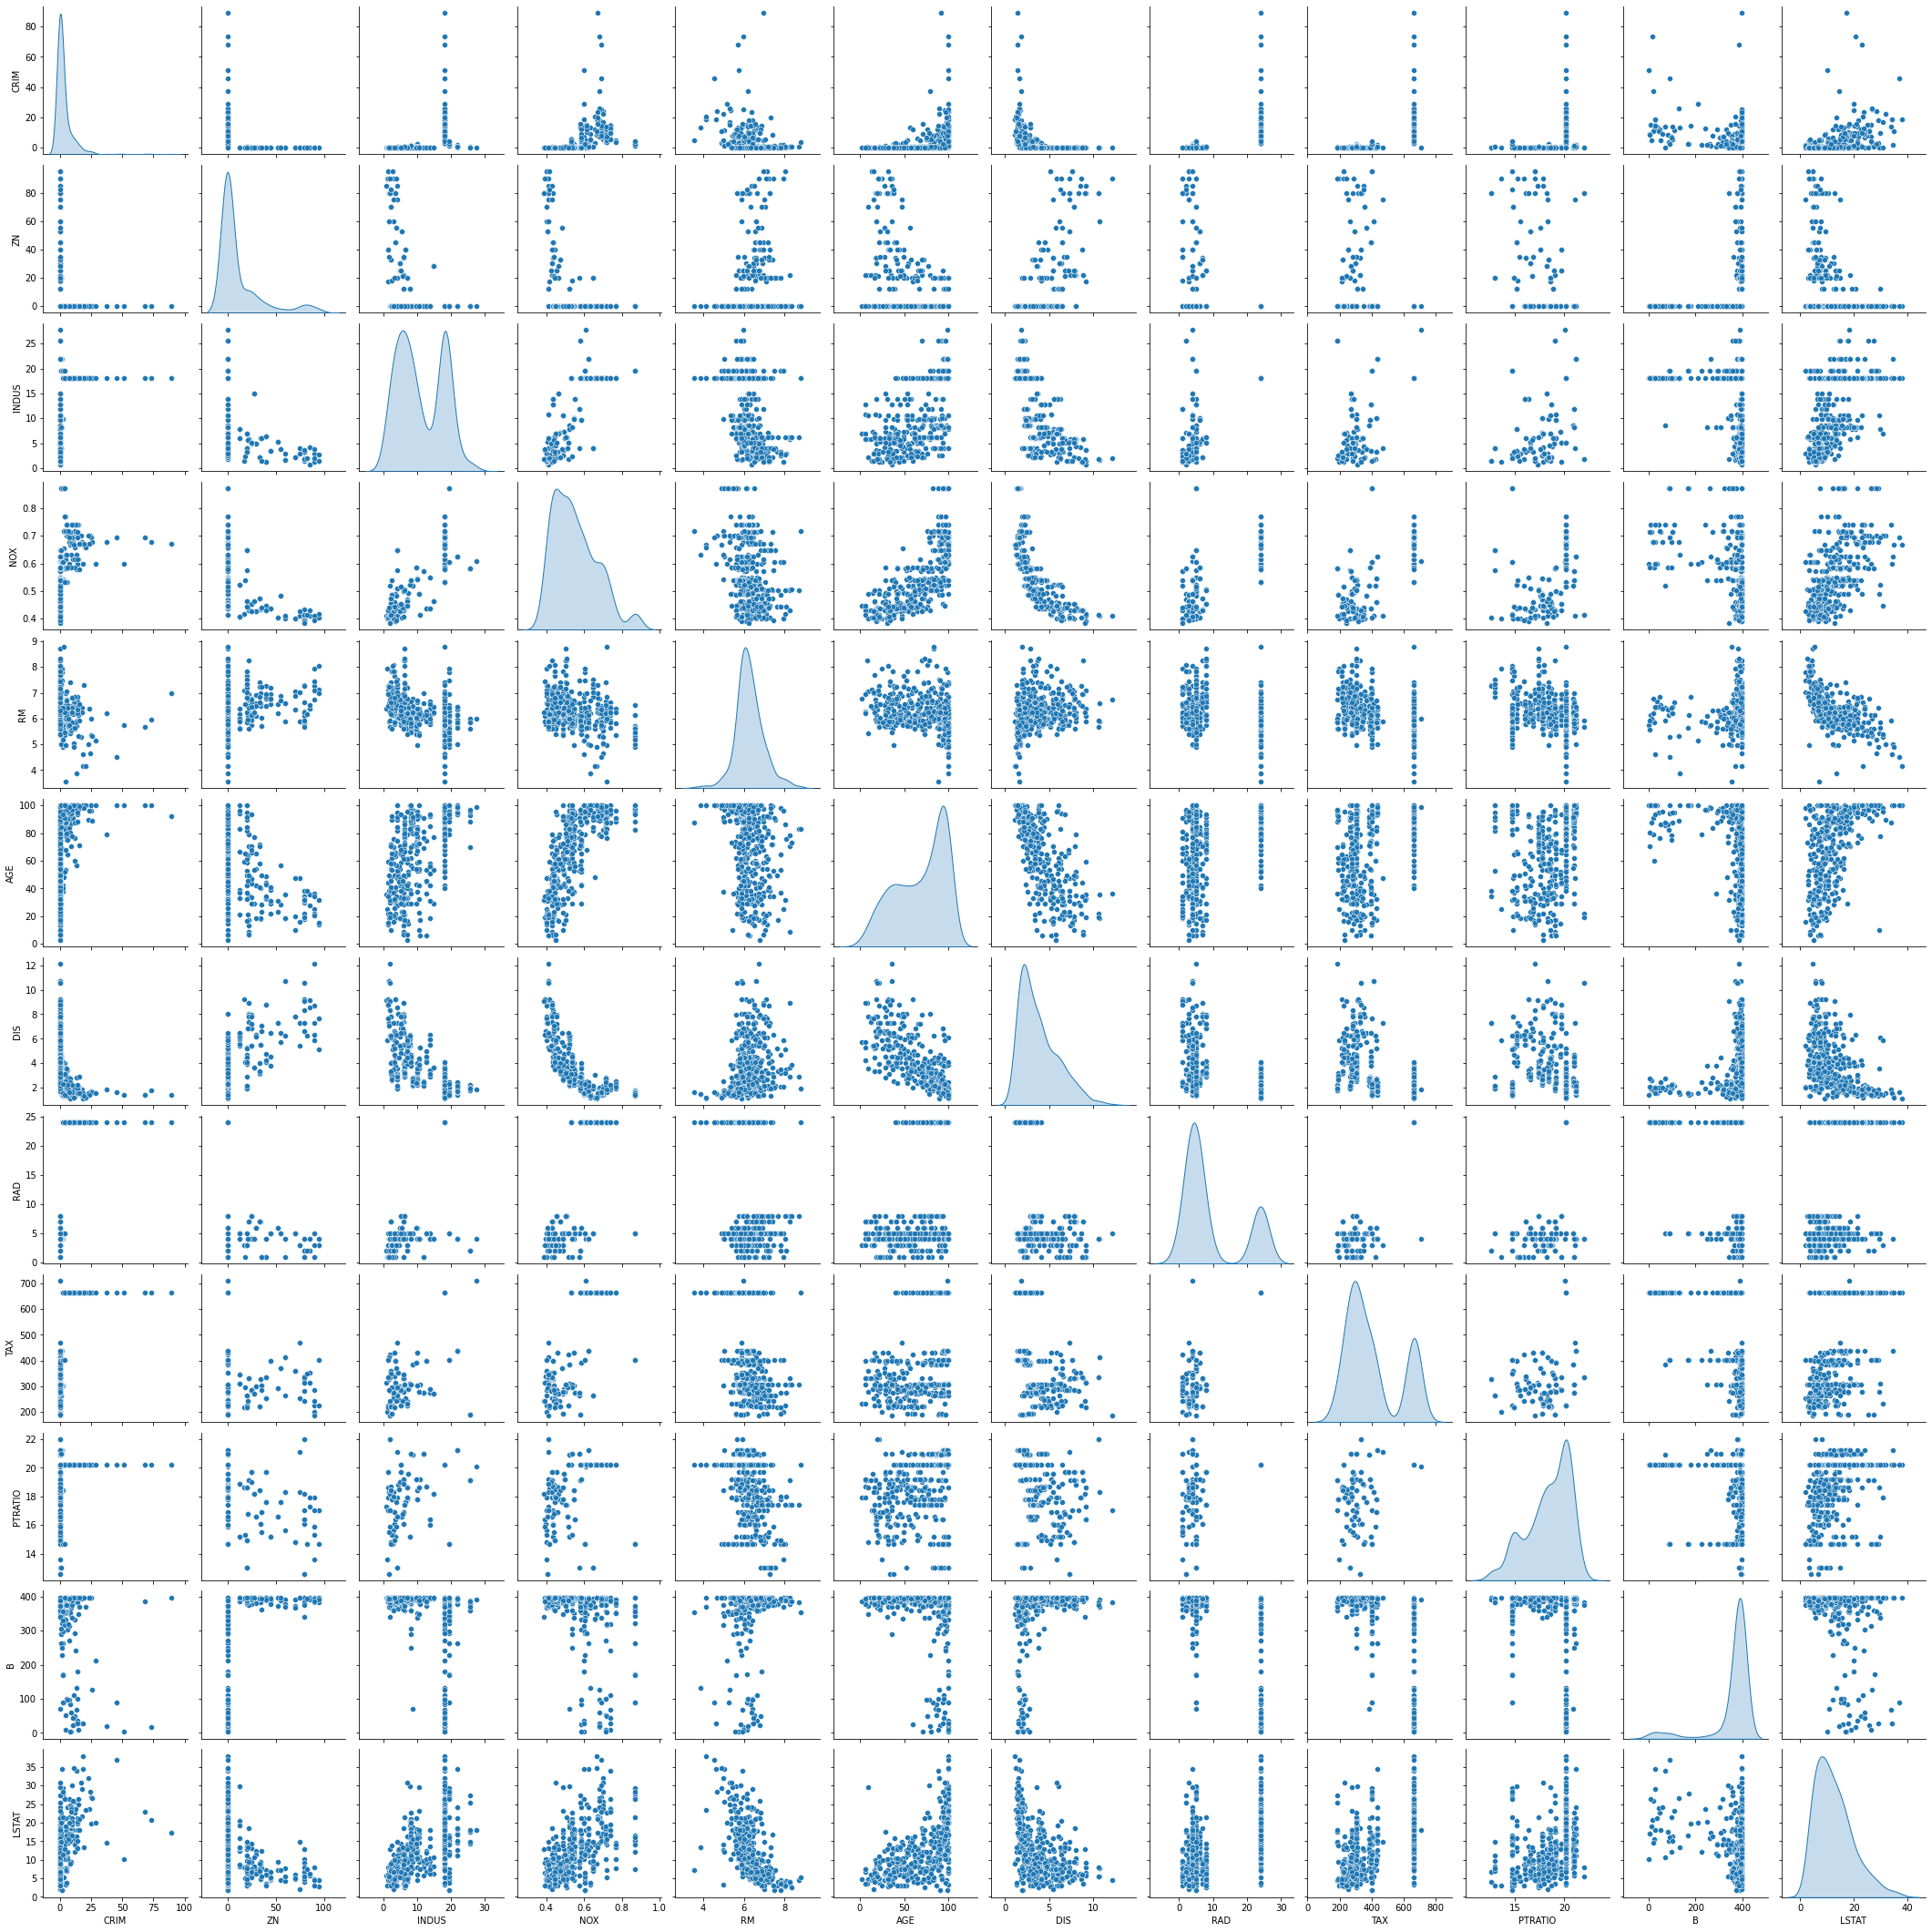

In [165]:
sb.pairplot(x_train[["CRIM","ZN","INDUS", "NOX","RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]], diag_kind="kde")

# 6. Separar labels del dataframe:

In [340]:
y_train = x_train.pop("Labels")
y_test = x_test.pop("Labels")

# 7. Normalización de datos:

In [341]:
#d = x_train.pop("River")
#e = x_train.pop("noRiver")
train_stats= x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000
PTRATIO,405.0,18.437037,2.141275,12.60000,17.30000,18.80000,20.20000,22.0000


In [342]:
#c = x_test.pop("CHAS")
test_stats = x_test.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,101.0,3.385698,6.923001,0.01096,0.07151,0.21409,4.34879,41.5292
ZN,101.0,12.549505,25.796560,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,101.0,11.292475,7.505657,0.46000,4.93000,8.14000,18.10000,27.7400
NOX,101.0,0.561100,0.117488,0.38900,0.44900,0.53800,0.64700,0.8710
RM,101.0,6.344248,0.749688,4.36800,5.95200,6.31500,6.63000,8.7040
AGE,101.0,69.909901,29.196954,6.60000,45.60000,83.50000,93.60000,100.0000
DIS,101.0,3.638435,1.863830,1.20240,2.12220,2.87150,5.11670,8.3248
RAD,101.0,9.851485,9.092179,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,101.0,417.851485,185.985880,188.00000,264.00000,307.00000,666.00000,711.0000
PTRATIO,101.0,18.529703,2.266872,12.60000,17.80000,19.20000,20.20000,21.2000


In [343]:
#a = df.pop("CHAS")
b = df.pop("Labels")
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats #USARE ESTAS ESTADISTICAS, Y NO SOLAMENTE LA TAJADA DE DATOS DE ENTRENAMIENTO.

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


In [344]:
x_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,River,noRiver
329,0.06724,0.0,3.24,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,0.0,1.0
371,9.23230,0.0,18.10,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,0.0,1.0
219,0.11425,0.0,13.89,0.5500,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,1.0,0.0
403,24.80170,0.0,18.10,0.6930,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,0.0,1.0
78,0.05646,0.0,12.83,0.4370,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.21038,20.0,3.33,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85,0.0,1.0
227,0.41238,0.0,6.20,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,0.0,1.0
148,2.33099,0.0,19.58,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,0.0,1.0
143,4.09740,0.0,19.58,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,0.0,1.0


In [345]:
def normalization(datos):
    return (datos-df_stats["mean"])/df_stats["std"]

norm_x_train = normalization(x_train)
norm_x_test = normalization(x_test)

In [346]:
norm_x_train.tail()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,River,noRiver
279,-0.395643,0.370303,-1.137956,-0.964768,0.750573,-1.292233,0.145156,-0.522484,-1.140622,-1.642320,0.440616,-1.092704,-0.272329,0.272329
227,-0.372159,-0.487240,-0.719610,-0.437488,1.250134,0.402329,-0.275129,-0.177944,-0.600682,-0.487557,0.168750,-0.881250,-0.272329,0.272329
148,-0.149105,-0.487240,1.230727,2.729645,-1.563632,0.896132,-1.075857,-0.522484,-0.031074,-1.734701,0.003461,2.193923,-0.272329,0.272329
143,0.056255,-0.487240,1.230727,2.729645,-1.162275,1.116390,-1.131800,-0.522484,-0.031074,-1.734701,0.440616,1.927856,-0.272329,0.272329
334,-0.415756,-0.487240,-0.866833,-0.342560,0.036102,-1.068423,1.264826,-0.522484,-1.093155,0.805778,0.358465,-0.826637,-0.272329,0.272329


In [375]:
xNorm_stats = norm_x_train.describe()
xNorm_stats = xNorm_stats.transpose()
xNorm_stats #USARE ESTAS ESTADISTICAS, Y NO SOLAMENTE LA TAJADA DE DATOS DE ENTRENAMIENTO.

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,0.006605,1.043761,-0.419367,-0.410493,-0.388900,-0.016188,9.924110
ZN,405.0,-0.012680,0.972813,-0.487240,-0.487240,-0.487240,0.048724,3.586088
INDUS,405.0,-0.005660,0.976503,-1.515487,-0.847883,-0.210890,1.014995,2.420170
NOX,405.0,-0.013784,0.997294,-1.464433,-0.912126,-0.144075,0.598087,2.729645
RM,405.0,-0.021159,0.982828,-3.876413,-0.578742,-0.130419,0.475886,3.551530
AGE,405.0,-0.011827,0.991462,-2.333128,-0.837508,0.281542,0.906790,1.116390
DIS,405.0,0.018547,1.026814,-1.265817,-0.815042,-0.248345,0.674147,3.956602
RAD,405.0,-0.008652,0.989814,-0.981871,-0.637331,-0.522484,1.659603,1.659603
TAX,405.0,-0.014226,0.973423,-1.312691,-0.737150,-0.440480,1.529413,1.796416
PTRATIO,405.0,-0.008544,0.989067,-2.704703,-0.533747,0.159111,0.805778,1.637208


# 8. Construcción del modelo:


In [347]:
my_model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(norm_x_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# 9. Compilar el modelo

In [348]:
optimizador= tf.keras.optimizers.RMSprop(0.001)
my_model.compile(loss = "mse",
             optimizer = optimizador,
             metrics = ["mse","mae"])

# 10. Resumen del modelo

In [349]:
my_model.summary()
plot_model(my_model, show_shapes=True)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                960       
_________________________________________________________________
dropout_49 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# 11. Entrenamiento del modelo

In [365]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

historia = my_model.fit(norm_x_train,
                    y_train,
                    epochs=1000,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop,PrintDot()])


...........................

In [366]:
hist = pd.DataFrame(historia.history)
hist["epoch"]= historia.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
22,7.037436,7.037436,2.026852,10.782159,10.782159,2.256438,22
23,7.736527,7.736527,2.088099,11.497746,11.497746,2.285987,23
24,7.947786,7.947786,2.195285,10.976808,10.976808,2.264408,24
25,8.105255,8.105255,2.137707,10.715321,10.715321,2.179563,25
26,7.310685,7.310685,2.034516,10.082226,10.082226,2.167516,26


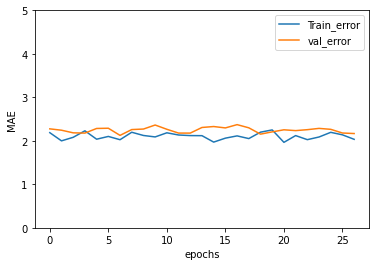

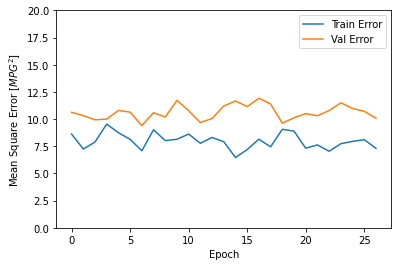

In [367]:
def plot_history(historia):
    hist = pd.DataFrame(historia.history)
    hist["epoch"]= historia.epoch
    
    plt.figure()
    plt.xlabel("epochs")
    plt.ylabel("MAE")
    plt.plot(hist["epoch"], hist["mae"], label="Train_error")
    plt.plot(hist["epoch"], hist["val_mae"], label="val_error")
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
plot_history(historia)

# 10. Evaluar el modelo

In [372]:
loss, mae, mse = my_model.evaluate(norm_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

4/4 - 0s - loss: 5.8355 - mse: 5.8355 - mae: 1.8150
Testing set Mean Abs Error:  5.84 MEDV


# 11. Predicciones

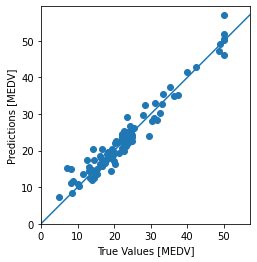

In [373]:
test_predictions = my_model.predict(norm_x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

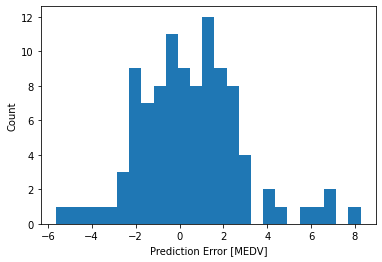

In [374]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")